# Project 2 : Speed Dating Experiment

Team 3: Fireflies

Members: Chunhui Zhu, Yuen Chun Wong, and Chunmei Zhu

Date : 3/16/2019

### Project 2  Requirement 

Identify a large 2-node network dataset—you can start with a dataset in a repository.  

Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

What can you infer about each of the distinct groups?

## Data Description 

We picked a dataset from Kaggle, called 'Speed Dating Experiment'.  https://www.kaggle.com/annavictoria/speed-dating-experiment

The data set we will explore in the project is named “Speed Dating Experiment”, as found on Kaggle.com. It was compiled by professors Ray Fisman and Sheena Iyengar from Columbia Business School.

Data was gathered from 552 participants in experimental speed dating events from 2002-2004. 

During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 

At the end of their four minutes, participants were asked if they would like to see their date again. 

They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

Among six attributes rating scores, the survey numbers were ased on the differnt questions. Examples:

attr1_1, sinc1_1, intel1_1,fun1_1,amb1_1, shar1_1: what you look for in the opposite sex. (on a scale of 1-10 (1=not at all important, 10=extremely important))

## Our intrested

We analyze gender differences in dating preferences.
What influences love at first sight (Between Man and Women)?

## Data Exploration Ideas 

What are the least desirable attributes in a male partner? Does this differ for female partners?

How important do people think attractiveness is in potential mate selection vs. its real impact?

Are shared interests more important than a shared racial background?

Can people accurately predict their own perceived value in the dating market?

## Python Code

We already loaded the dataset in our github. The following steps will do some data cleaning and minining, to extract some data for answering the questions. 

### Selecte 1st group Data

Steps: 

Since first meetup has 10 women and 10 men attended, and they all got chance to talk to everyone in the same group, I limited our data by selecting first 20 iids. For iids, one to ten represent women, and 11-20 represent men. 

Among all 119 columns, we selected four columns 'iid','gender','pid','dec'.

'iid' and 'pid' represet a person's id and s/he paried up parter's id. 

'dec'  represents the person # iid who was willing to date as yes=1, no=0 to the parter. And they parters were opposite sex. 

We selected 'dec'==1, by creating the direct relationship that #iid was intrested in #pid. 

Then we used nx.DiGraph() generater function to generate from-to edges and created a directed graph. 

In [47]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
url='https://raw.githubusercontent.com/czhu505/Data620-Fireflies/master/project_2/Speed_Dating_Data.csv'
raw=pd.read_csv(url)

In [49]:
dating1=raw[raw.iid<21]

In [50]:
#since women and men will meet everyone at one time, it should be 10*10*2.
len(dating1)

200

In [51]:
#choose variables
data=dating1[['iid','gender','pid','dec']]
data.pid=data.pid.astype(int)

C:\Users\czhu5\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [52]:
#dec==1,means the person #iid willing to date the parter #pid
data=data[data.dec==1]

In [53]:
#color the edges: bule is from a man, red is from awomom
data['color'] = np.where(data.gender==1, 'b', 'r')

In [54]:
dec_graph = nx.from_pandas_edgelist(data, source='iid', 
                                      target='pid',
                                      edge_attr='color',
                                      create_using = nx.DiGraph())

edges = dec_graph.edges()
colors = [dec_graph[u][v]['color'] for u,v in edges]

#show from node and to node
print(edges)

[(1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 17), (1, 19), (1, 20), (12, 7), (12, 8), (12, 9), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (15, 1), (15, 2), (15, 3), (15, 4), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (17, 4), (17, 9), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (19, 10), (20, 8), (2, 14), (2, 17), (2, 19), (2, 20), (4, 14), (4, 19), (4, 20), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (16, 1), (16, 2), (16, 3), (16, 4), (16, 6), (16, 7), (16, 8), (16, 9), (18, 2), (18, 7), (18, 8), (6, 11), (6, 12), (6, 14), (6, 17), (6, 19), (6, 20), (7, 14), (7, 17), (7, 19), (7, 20), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (8, 20), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (9, 20), (10, 13), (10, 17), (10, 19), (1

In [55]:
len(edges)

111

Here we can see 89 (200-111) pairs nodes which were not intested in to date their parters. 

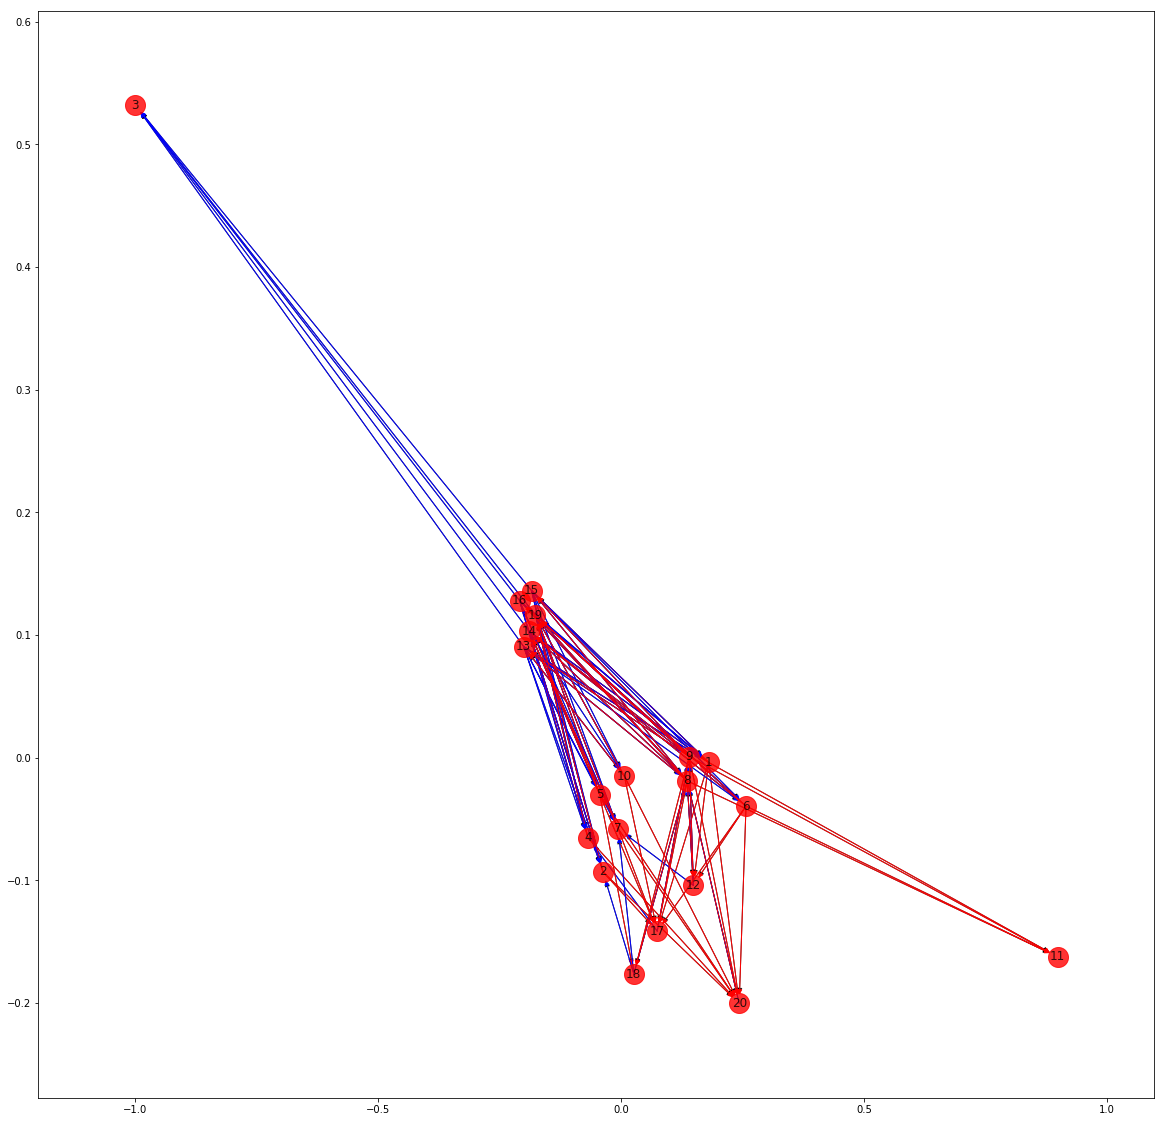

In [68]:
pos = nx.spring_layout(dec_graph)
plt.figure(figsize = (20,20))
nx.draw_networkx(G=dec_graph, with_labels = True, pos=pos,node_list=dec_graph.nodes(),
                      alpha=0.8, node_size=400,cmap=plt.cm.jet)

nx.draw_networkx_edges(G=dec_graph, pos=pos, edge_color=colors,
                       arrows=True)
plt.show()

There are some very intrested nodes in above graph:

Women seem between two groups of men in the network,not having high intrested nor low intrested intreacting with opposite sex. But men are divided into two diffierent group, high interested and low intrestedd in dating opposite sex. 


#20 (man) has 9 women interested in dating with him, but he did not select a sigle woman. 

#3 (woman) and #11 (man) whom have a few opposite sex intrested in them, but they didn't want to date anyone in this group. 

#18, #17, #12 these men are tend to be more attracted in women group.

#15, #16, #19, #14 and #13 these men have broad intrested in women group. 

In [69]:
# calculate centrality metrics
degree = pd.DataFrame.from_dict(dict(nx.degree(dec_graph)), orient='index', columns=['Degree'])
deg_cent = pd.DataFrame.from_dict(nx.degree_centrality(dec_graph), orient='index', columns=['Deg_cent'])
eigen_cent = pd.DataFrame.from_dict(nx.eigenvector_centrality(dec_graph), orient='index', columns=['Eigen_cent'])
clos_cent = pd.DataFrame.from_dict(nx.closeness_centrality(dec_graph), orient='index', columns=['Clos_cent'])
bet_cent = pd.DataFrame.from_dict(nx.betweenness_centrality(dec_graph), orient='index', columns=['Bet_cent'])

In Graphy Theories, eigenvector centrality is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

That is reason we used eigenvector value to sort the following matrix.

In [58]:
dfs = [degree,deg_cent,eigen_cent,clos_cent,bet_cent]

from functools import reduce # to merge multiple dataframes
metrics = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)
metrics.sort_values('Eigen_cent', ascending=False)

,Degree,Deg_cent,Eigen_cent,Clos_cent,Bet_cent
19,19,1.000000,0.336899,0.608421,0.147646
20,10,0.526316,0.336899,0.608421,0.017134
14,18,0.947368,0.308086,0.563353,0.128937
8,18,0.947368,0.295339,0.563353,0.169840
17,10,0.526316,0.295204,0.563353,0.022665
9,17,0.894737,0.266388,0.524501,0.123316
4,9,0.473684,0.237657,0.490662,0.017378
7,11,0.578947,0.236234,0.524501,0.024854
2,10,0.526316,0.207503,0.490662,0.017175
6,11,0.578947,0.185867,0.460925,0.021643


From above, we observed men in general were in two extrem charaters, very active in social relationship or very unactive. And women in general were just at between two man groups, not very active, not unactive.   

#19, #20, #14 top 3 are the people among 20 people who have the high intraction / connection with other people. #15, #16, #18 has the least interaction in the relationship. 

## Find Comments

In [160]:
rating=dating1[['iid','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1',]]
rating=rating.dropna(how='any',axis=0)
rating=rating.drop_duplicates()
rating.set_index('iid')
data=rating.set_index('iid')
data = data.iloc[:, 1:].values  

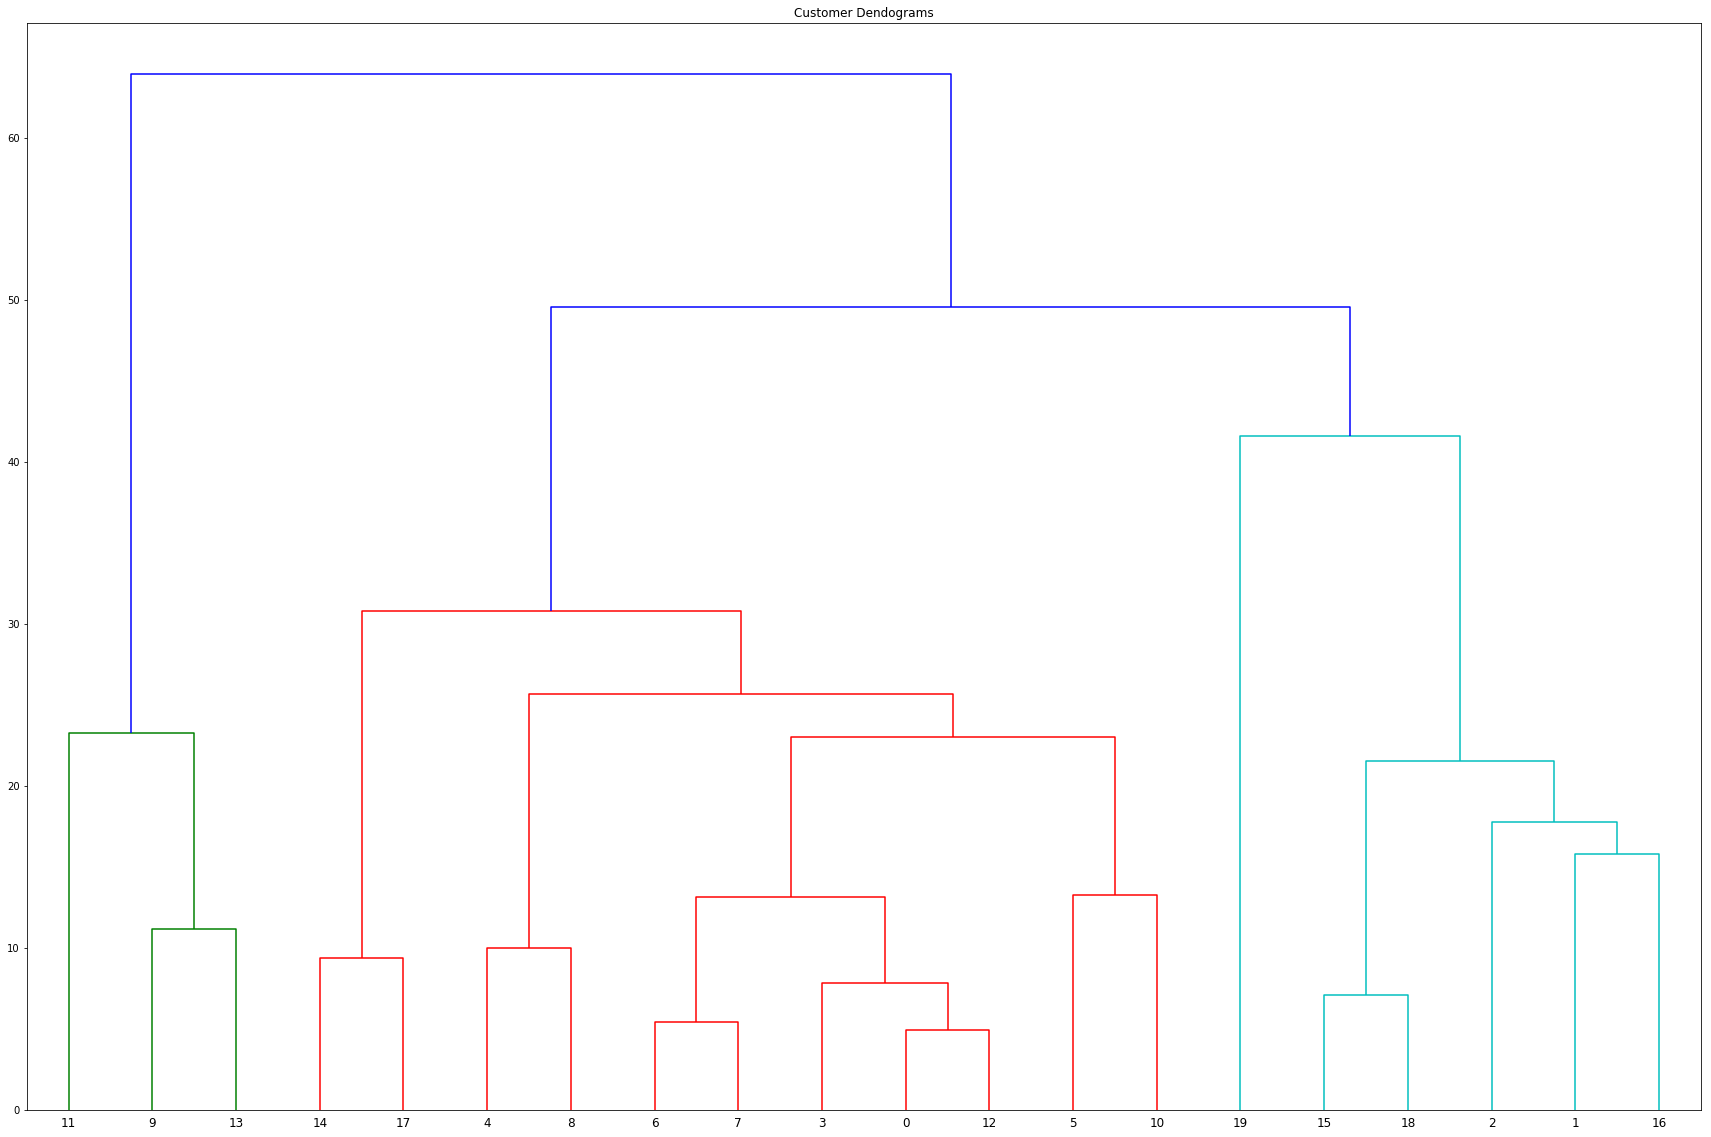

In [161]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(30, 20))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [158]:
intrests=dating1[['iid','sports', 'tvsports', 'exercise', 'dining', 'museums','art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']]
intrests=intrests.dropna(how='any',axis=0)
intrests=intrests.drop_duplicates()
data=intrests.set_index('iid')
data = data.iloc[:, 2:].values  

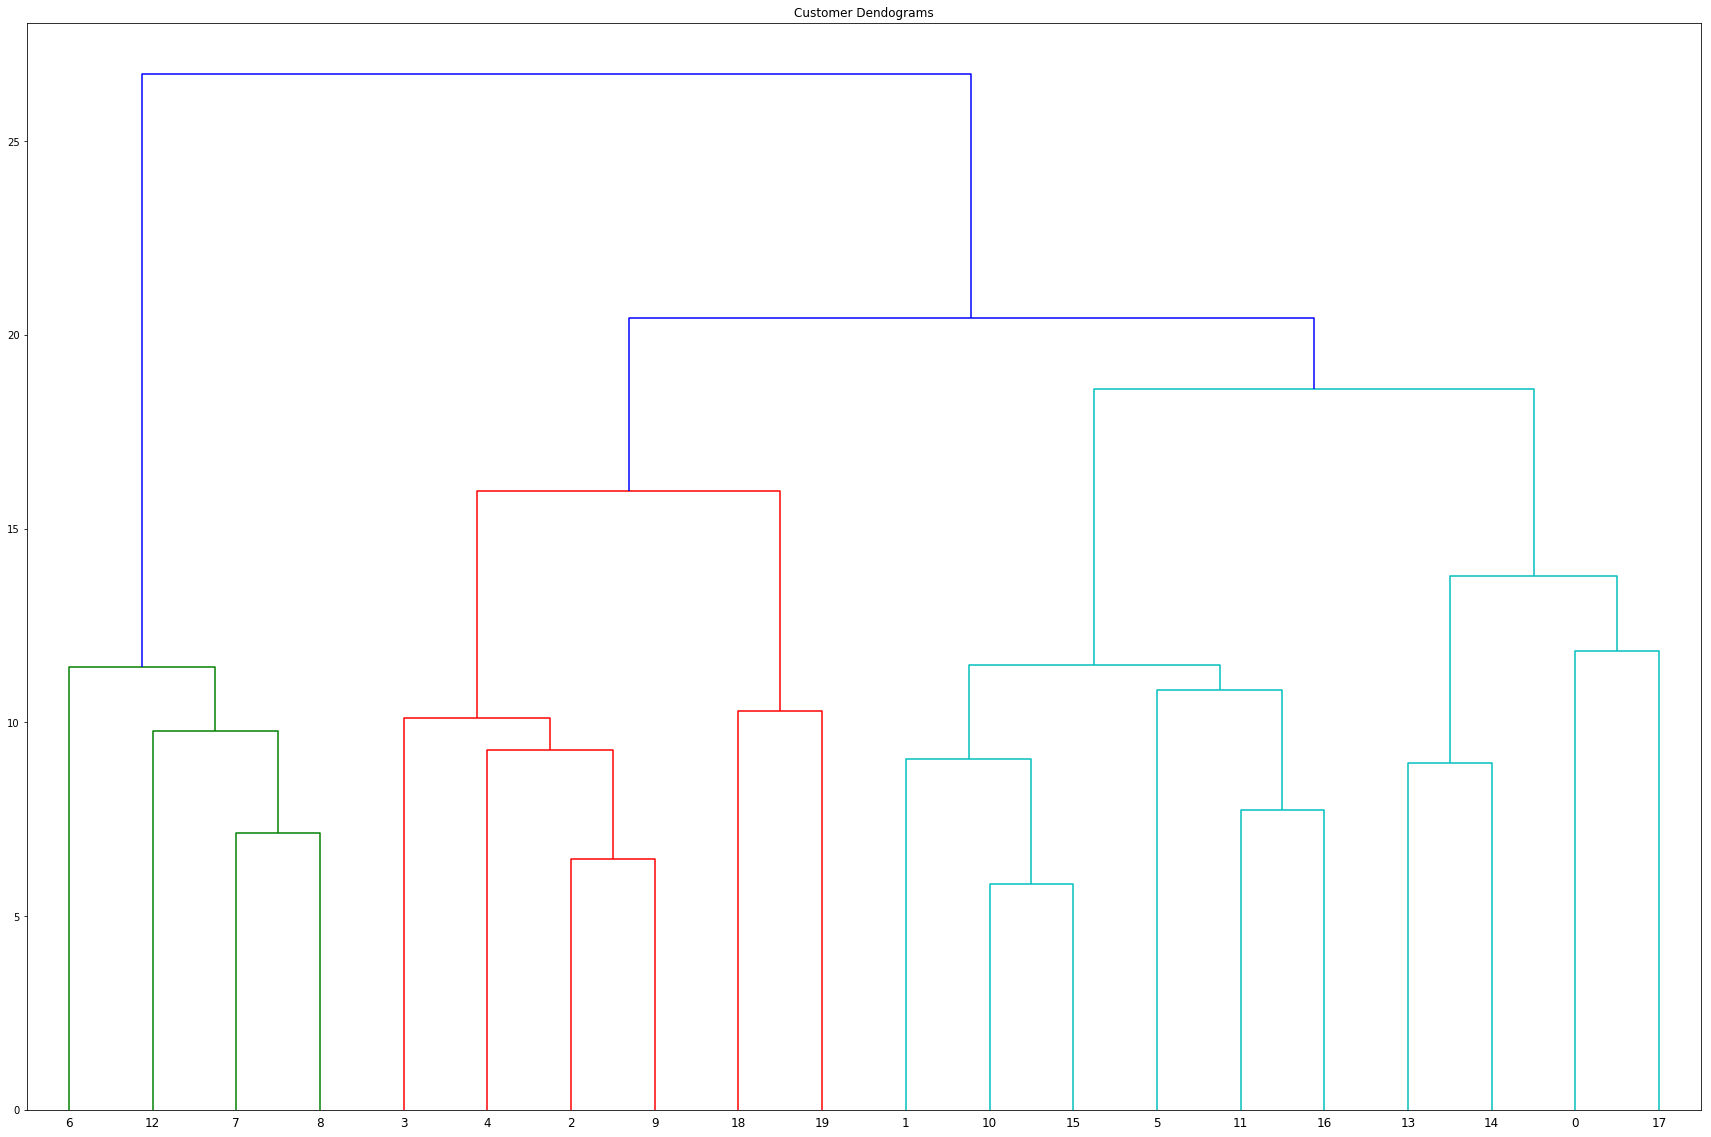

In [159]:
plt.figure(figsize=(30, 20))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

###  Finding (template)

we observe that a man’s demand for intelligence and ambition does not extend to women who are more intelligent or ambitious than he is. In fact, a man is significantly less likely to accept a woman who is more ambitious than he. Finally, women prefer men who grew up in wealthier neighborhoods, while men express no such preference.